# <font color= SlateBlue>MLG382 Project 1 Report GroupM</font>

github link: https://github.com/NOT-A-ROBOT-Michael/Machine_Learning_Course_Project1_GroupM

## 1. Problem Statement <br>
The financial companny BC finance wants to outomate their home loan eligibility program and preapprove aplicants who use their services based uponprior home-loan applicantions conducted (_<font color=mediumpurple>in realtime</font>_). The loan will be approved or rejected based upon the factors determined by the applicant's financial details provided such as the appliant's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other information provided. Sofar the company has recorded prior home-loan applicantions manially by their loan accessors and finance daministrators. The company aims to utilise the dataset to determine the eligibility of future home-loan applicantions, (<font color=mediumpurple>as provided in the data folder</font>)

## 2. Hypothesis Generation <br>
### Hypothesis:
1. Gender Bias Hypothesis: The system may exhibit gender bias if historical data shows disparities in loan repayment based on gender. For instance, if past data indicates that one gender tends to default on loans more than the other, the system might unintentionally favor the gender with better repayment records.
2. Marital Status Bias Hypothesis: Similar to gender bias, if married individuals historically have a better repayment track record compared to unmarried ones, the system might show a preference towards married applicants.
3. Education Bias Hypothesis: The system might favor applicants with higher levels of education, assuming they have better financial literacy and stability. This bias could disadvantage those with lower levels of education, even if they have strong financial profiles.
4. Number of Dependents Hypothesis: Applicants with fewer dependents might be favored since they might be perceived as having more disposable income to repay the loan. Conversely, those with more dependents might be seen as riskier.\n",
5. Income Hypothesis: The system is likely to favor applicants with higher incomes, as they are perceived as having the financial means to repay the loan. However, this could unintentionally disadvantage lower-income applicants who are financially responsible but have lower earnings.
6. Loan Amount Hypothesis: Higher loan amounts might be associated with higher risk, especially if the applicant's income is not proportionate to the loan amount. Thus, the system may be more cautious or stringent in approving larger loans.
7. Credit History Hypothesis: Applicants with a strong credit history are likely to be favored, as they demonstrate a proven track record of managing credit responsibly. Those with poor credit histories may face greater scrutiny or rejection.<br>
>The hypothesis suggests that the loan approval system, while aiming for objectivity, the system might induce biases in historical data. Additionally, it may prioritize financial risk mitigation over social equality mitigation, potentially disadvantaging certain groups. Regular audits, transparency in decision-making processes, and continual refinement of the algorithm can help mitigate these biases and ensure equality amongst applications assessed.

# Data Prep

In [8]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from skimpy import clean_columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Load data from csv file and inspect format:

In [11]:
df = pd.read_csv('./data/raw_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Clean column names:

In [12]:

cleancolumn_df = clean_columns(df)

Check for duplicates:

In [13]:
df.duplicated().sum()

0

After examining the prior code there are `no duplicates` in the data that needs to be cleaned.

Checking missing values and datatypes:

In [14]:
print(df.info())

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data contains some missing values with the most missing values ay credit_history(50) and self-employed(32). loan_id education, apllicant_income, coapplicant_income, property_area and loand status has 0 missing values. These missing values will need to be filled or dropped depending on eploratory data analysis and visualisation.

Check shape of data:

In [15]:
print(df.shape)

(614, 13)


The data has 614 rows and 13 columns.

Dropping irrelevant columns:

In [16]:
clean_df=cleancolumn_df.drop(columns=['loan_id'], inplace=False)

print(clean_df.head())

print(clean_df.shape)

  gender married dependents     education self_employed  applicant_income  \
0   Male      No          0      Graduate            No              5849   
1   Male     Yes          1      Graduate            No              4583   
2   Male     Yes          0      Graduate           Yes              3000   
3   Male     Yes          0  Not Graduate            No              2583   
4   Male      No          0      Graduate            No              6000   

   coapplicant_income  loan_amount  loan_amount_term  credit_history  \
0                 0.0          NaN             360.0             1.0   
1              1508.0        128.0             360.0             1.0   
2                 0.0         66.0             360.0             1.0   
3              2358.0        120.0             360.0             1.0   
4                 0.0        141.0             360.0             1.0   

  property_area loan_status  
0         Urban           Y  
1         Rural           N  
2         Urba

The loan ID column was dropped and the new clean_df now only contains 12 columns.

Check data discription and view rich data profile:

In [17]:
print(clean_df.describe())

from skimpy import skim
skim(clean_df)

       applicant_income  coapplicant_income  loan_amount  loan_amount_term  \
count        614.000000          614.000000   592.000000         600.00000   
mean        5403.459283         1621.245798   146.412162         342.00000   
std         6109.041673         2926.248369    85.587325          65.12041   
min          150.000000            0.000000     9.000000          12.00000   
25%         2877.500000            0.000000   100.000000         360.00000   
50%         3812.500000         1188.500000   128.000000         360.00000   
75%         5795.000000         2297.250000   168.000000         360.00000   
max        81000.000000        41667.000000   700.000000         480.00000   

       credit_history  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ applicant_income        │   0 │      0 │   5400 │   6100 │  150 │  2900 │  3800 │  5800 │  81000 │    ▇    │  │
│ │ coapplicant_income      │   0 │      0 │   1600 │   2900 │    0 │     0 │  1200 │  2300 │  42000 │    ▇    │  │
│ │ loan_amount             │  22 │   3.58 │    150 │     86 │    9 │   100 │   130 │   170 │    700 │   ▇▇▁   │  │
│ │ loan_amount_term        │  14 │   2.28 │    340 │     65 │   12 │   360 │   360 │   360 │    480 │    ▁ ▇  │  │
│ │ credit_history          │  50 │   8.14 │   0.84 │   0.36 │    0 │     1 │     1 │     1 │      1 │ ▁    ▇  │  │
│ └─────────────────────────┴─────┴────────┴────────┴────────┴──────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ gender                       │     13 │       2.12 │                        0.98 │                     601 │  │
│ │ married                      │      3 │       0.49 │                           1 │                     611 │  │
│ │ dependents                   │     15 │       2.44 │                        0.98 │                     599 │  │
│ │ education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ self_employed                │     32 │       5.21 │                        0.95 │                     582 │  │
│ │ property_area                │      0 │          0 │                           1 │                     614 │  │
│ │ loan_status                  │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Investigate data distribution for both numerical and categorical variables:

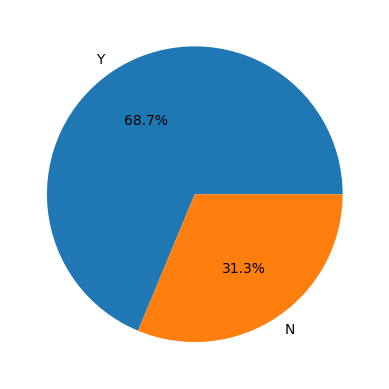

In [18]:
plt.pie(clean_df['loan_status'].value_counts().values, 
        labels=clean_df['loan_status'].value_counts().index, 
        autopct='%1.1f%%') 
plt.show() 

From the pie distribution chart of loan status it can be seen that the data is unbalanced as `68.7%` of loans were approved and only `31.3%` declined.

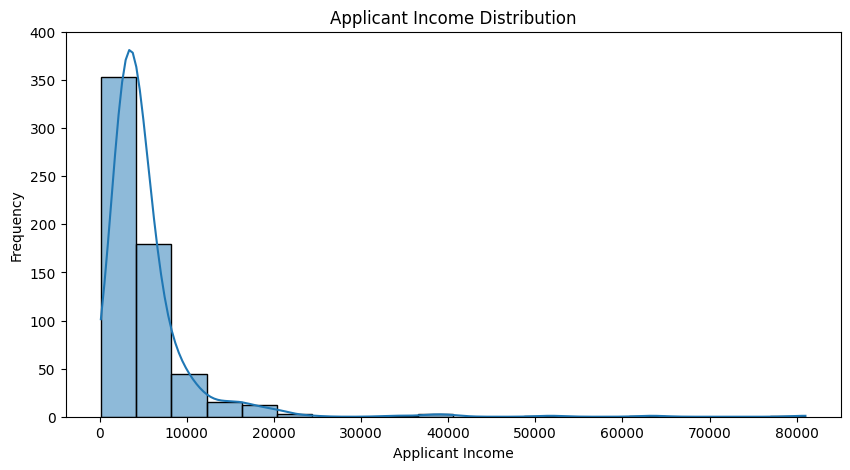

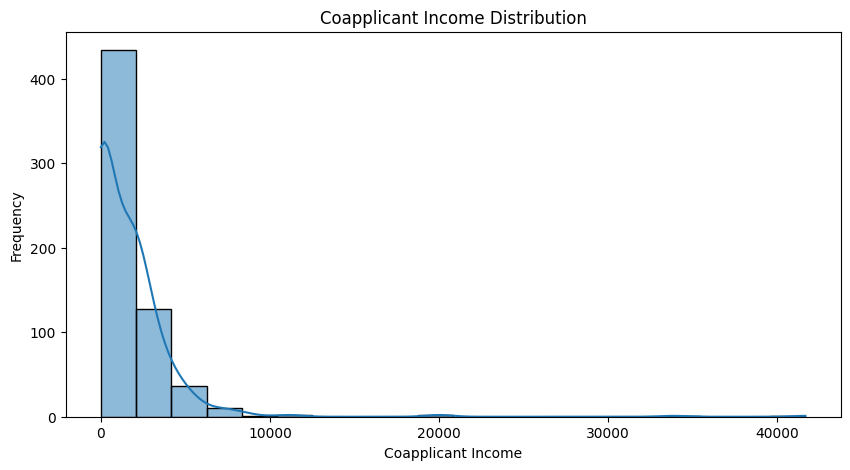

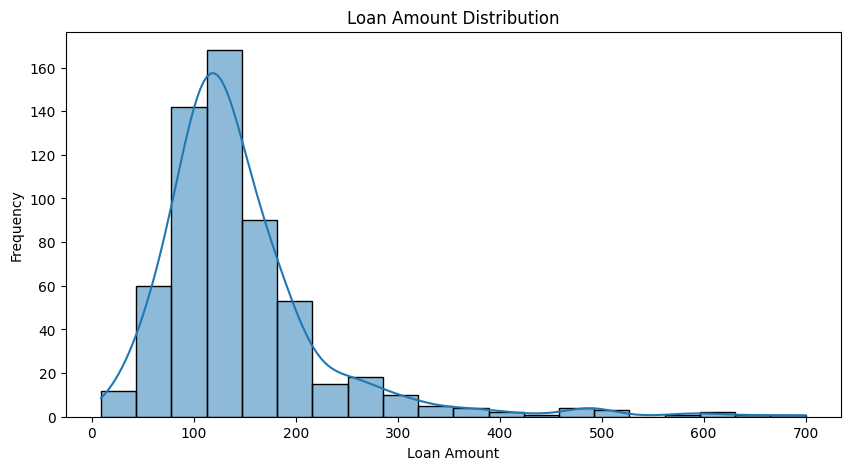

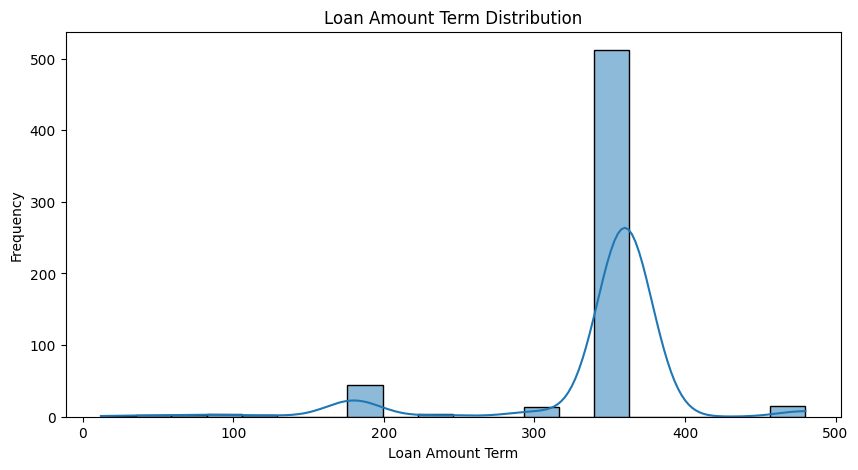

In [19]:
plt.figure(figsize=(10,5))
sb.histplot(data=clean_df, x='applicant_income', bins=20, kde=True)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')
plt.show()

plt.figure(figsize=(10,5))
sb.histplot(data=clean_df, x='coapplicant_income', bins=20, kde=True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('Coapplicant Income Distribution')
plt.show()


plt.figure(figsize=(10,5))
sb.histplot(data=clean_df, x='loan_amount', bins=20, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')
plt.show()

plt.figure(figsize=(10,5))
sb.histplot(data=clean_df, x='loan_amount_term', bins=20, kde=True)
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')
plt.title('Loan Amount Term Distribution')
plt.show()
     



From the histogram distribution plots it can be seen that the numerical data is `skew` for applicant income, coapplicant income and closer to normal distribution for loan amount and loan amount term.

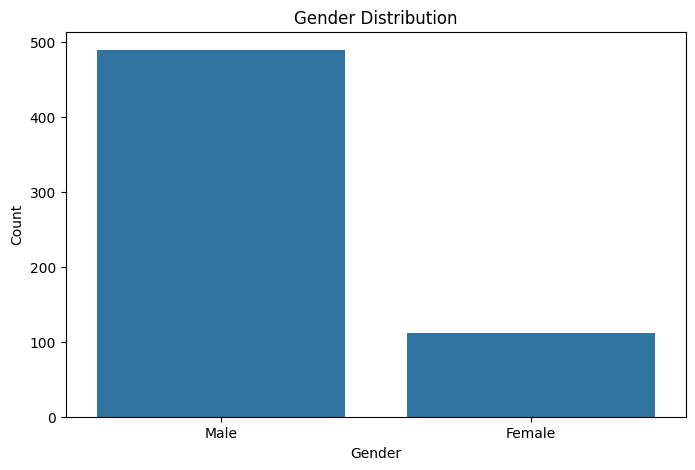

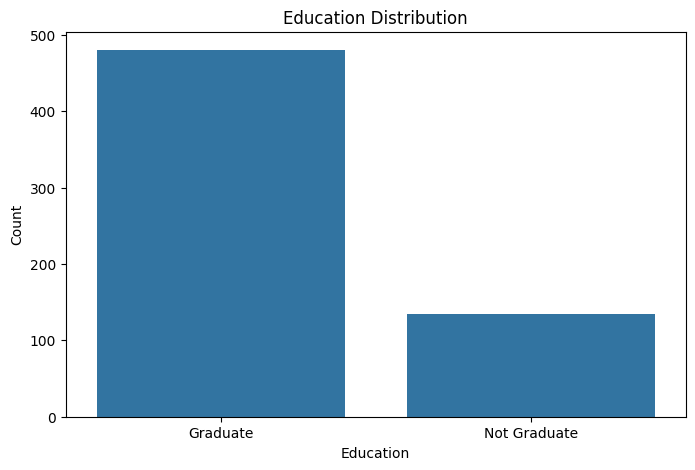

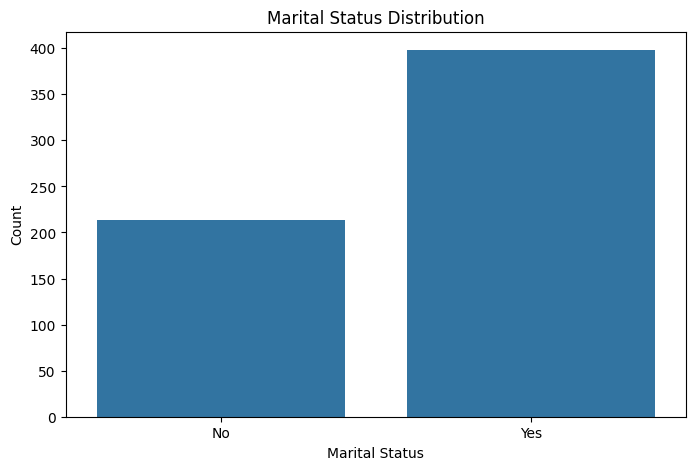

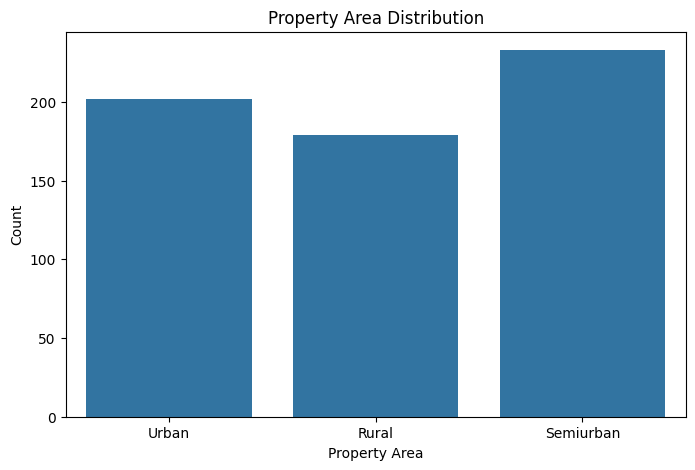

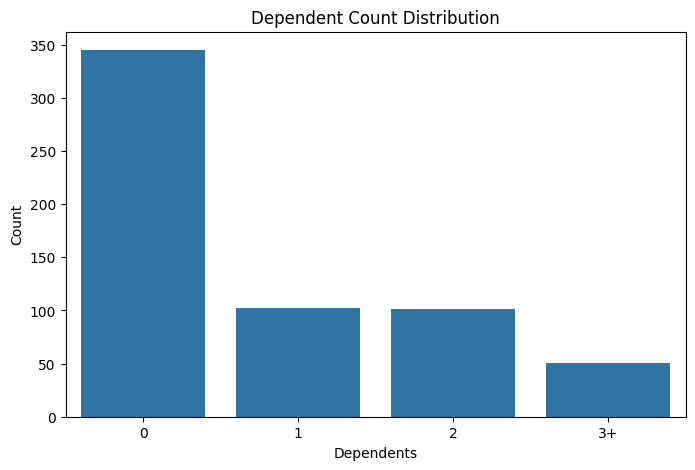

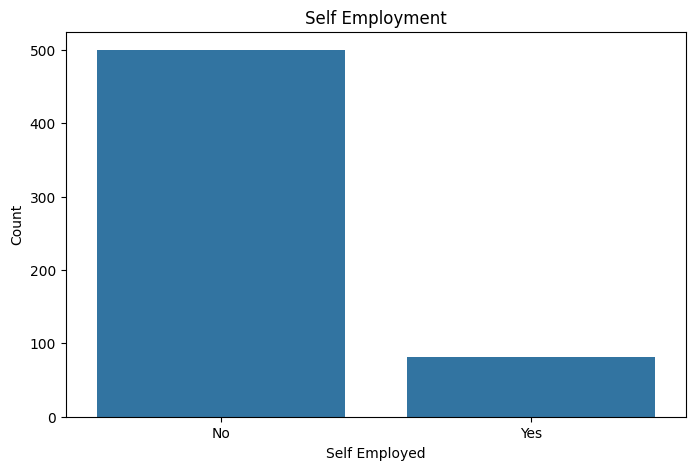

In [20]:
plt.figure(figsize=(8,5))
sb.countplot(data=clean_df, x='gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(data=clean_df, x='education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(data=clean_df, x='married')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(data=clean_df, x='property_area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Property Area Distribution')
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(data=clean_df, x='dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Dependent Count Distribution')
plt.show()

plt.figure(figsize=(8,5))
sb.countplot(data=clean_df, x='self_employed')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.title('Self Employment')
plt.show()

Multivariate data visualisation and analysis with pair plots for numerical data:

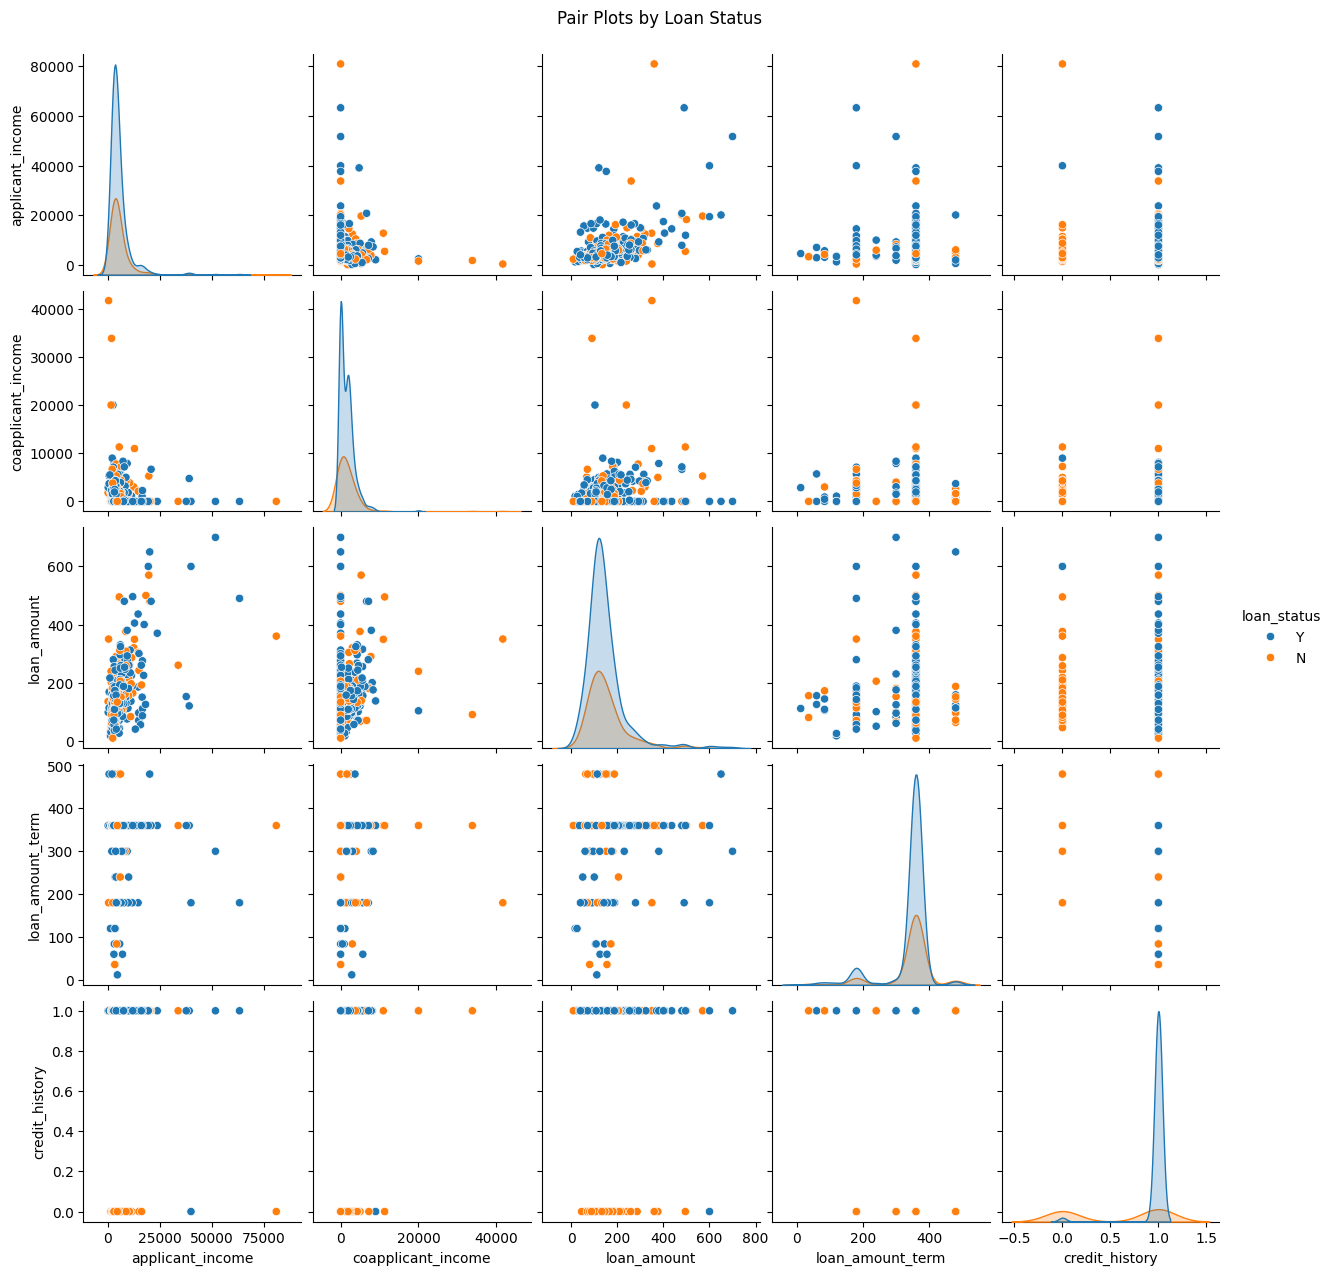

In [21]:
sb.pairplot(clean_df, hue='loan_status')
plt.suptitle('Pair Plots by Loan Status', y=1.02)
plt.show()

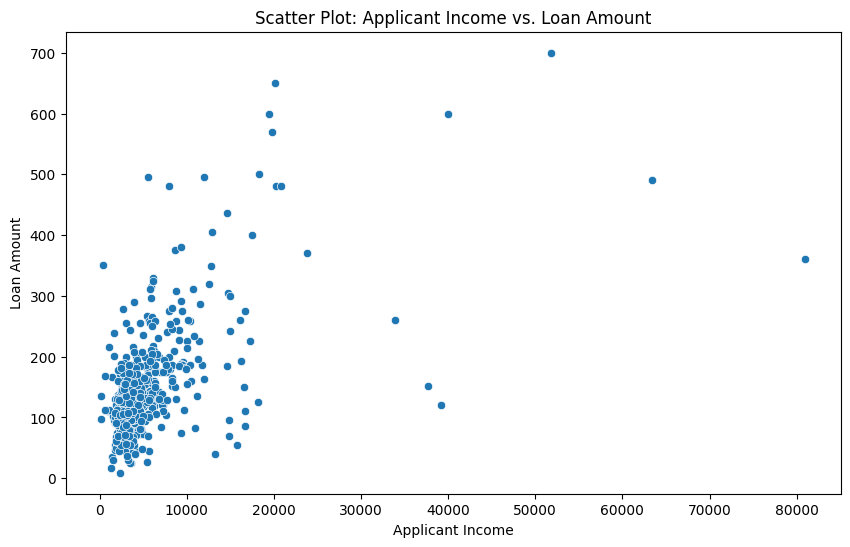

In [22]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=clean_df, x='applicant_income', y='loan_amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.show()
     

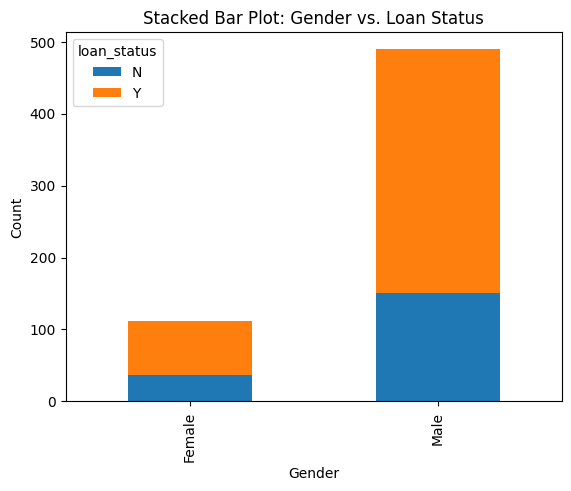

In [23]:
cross_tab = pd.crosstab(clean_df['gender'], clean_df['loan_status'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Gender vs. Loan Status')
plt.show()

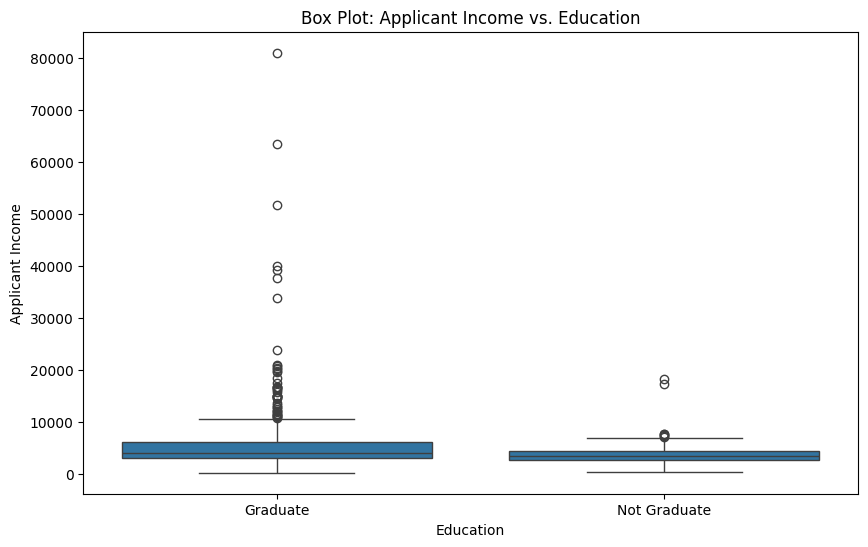

In [24]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=clean_df, x='education', y='applicant_income')
plt.ylabel('Applicant Income')
plt.xlabel('Education')
plt.title('Box Plot: Applicant Income vs. Education')
plt.show()

Using boxplots to check for outliers:

Text(0.5, 0, 'Loan Amount')

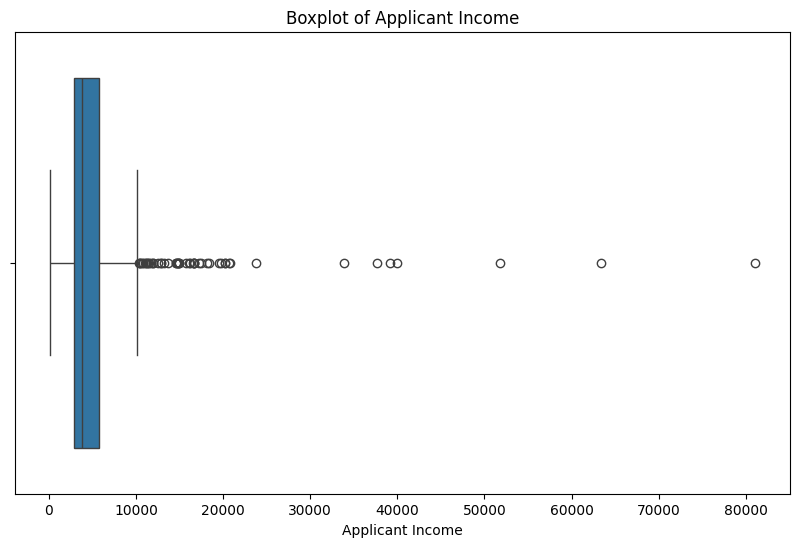

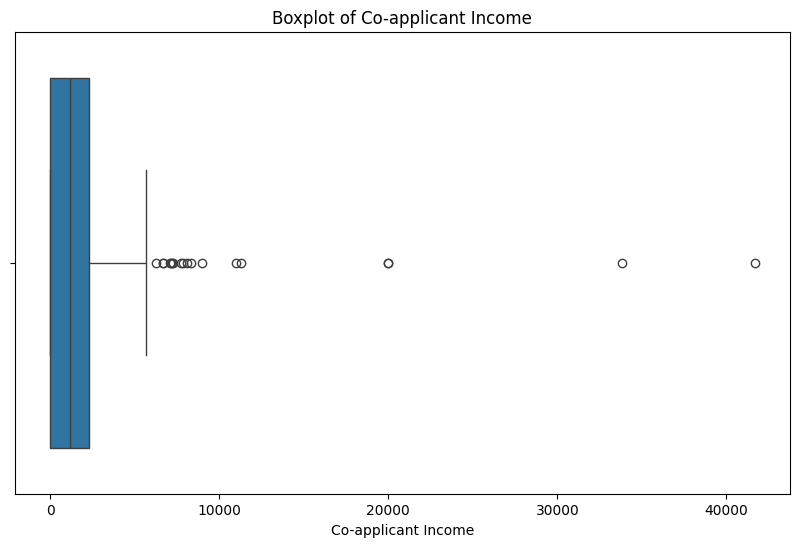

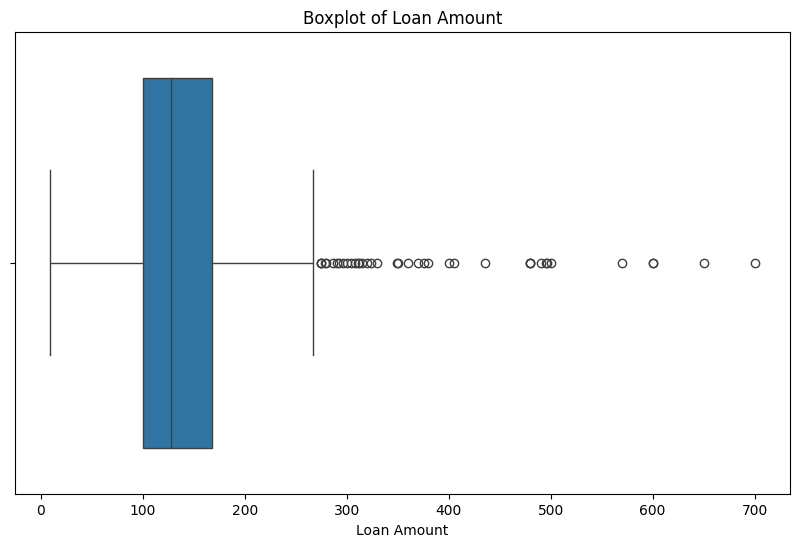

In [25]:
plt.figure(figsize=(10, 6))  
sb.boxplot(x=clean_df['applicant_income'])
plt.title('Boxplot of Applicant Income') 
plt.xlabel('Applicant Income')  

plt.figure(figsize=(10, 6))  
sb.boxplot(x=clean_df['coapplicant_income'])
plt.title('Boxplot of Co-applicant Income') 
plt.xlabel('Co-applicant Income')  

plt.figure(figsize=(10, 6))  
sb.boxplot(x=clean_df['loan_amount'])
plt.title('Boxplot of Loan Amount') 
plt.xlabel('Loan Amount')  


From the boxplots outliers are detected in Applicant Income  $> 20000$ , Co-Applicant Income $> 10000$ and Loan amount above $> 400$, to filter the data to dispose of these far outliers.

Dropping outliers and filling in missing values: 
- with the `modulus-entry` for <font color=blue_cream>categorical</font>, and the  for `median` <font color=slateblue>numerical</font>

In [26]:
clean_df = clean_df[
    (clean_df['applicant_income'] <= 20000) &
    (clean_df['coapplicant_income'] <= 10000) &
    (clean_df['loan_amount'] <= 400)
]

categorical_columns = ['gender', 'married', 'dependents', 'self_employed']
numerical_columns = ['loan_amount', 'loan_amount_term', 'credit_history']

for col in categorical_columns:
    clean_df[col].fillna(clean_df[col].mode()[0], inplace=True)

for col in numerical_columns:
    clean_df[col].fillna(clean_df[col].median(), inplace=True)

Checking if all missing values are filled and outliers dropped:

Text(0.5, 0, 'Loan Amount')

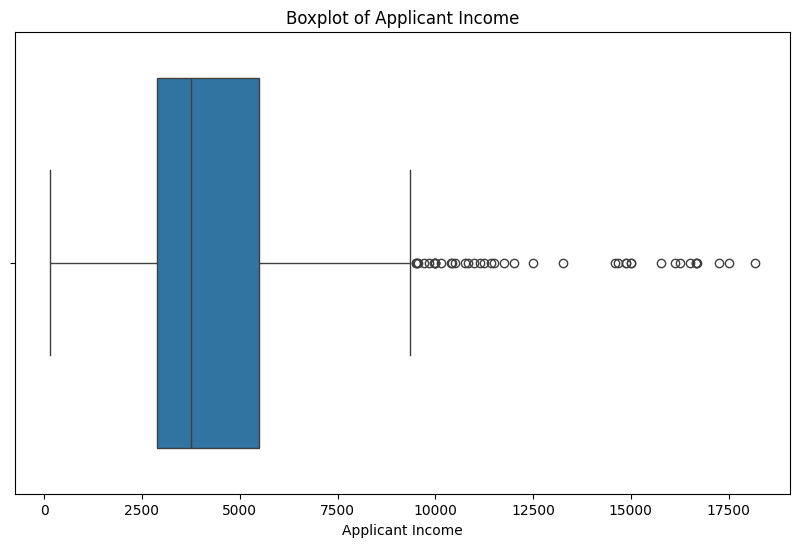

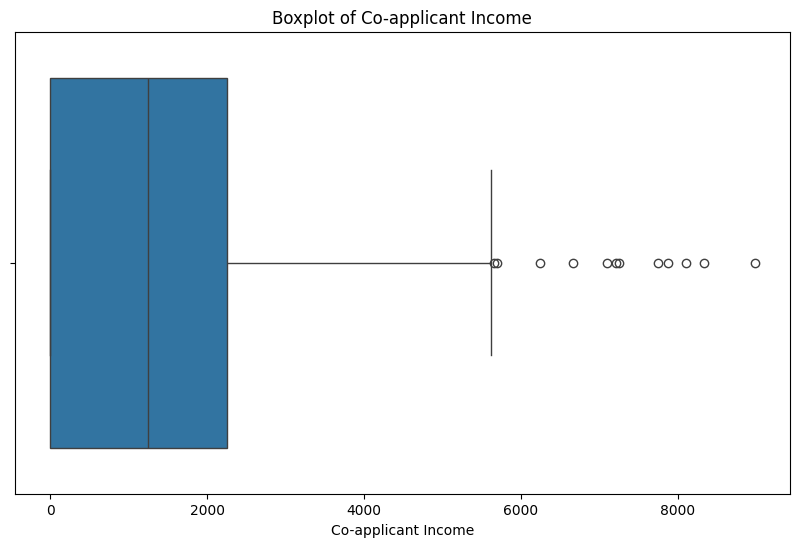

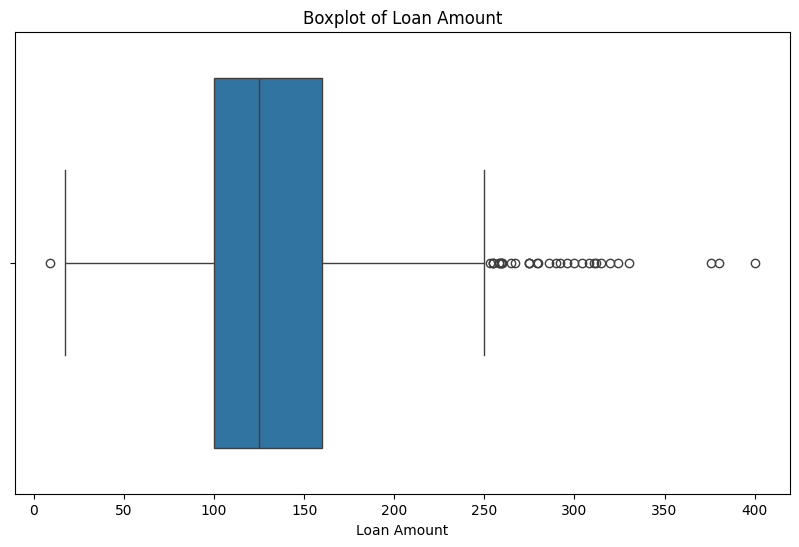

In [27]:
clean_df.isnull().sum()

plt.figure(figsize=(10, 6))  
sb.boxplot(x=clean_df['applicant_income'])
plt.title('Boxplot of Applicant Income') 
plt.xlabel('Applicant Income')  

plt.figure(figsize=(10, 6))  
sb.boxplot(x=clean_df['coapplicant_income'])
plt.title('Boxplot of Co-applicant Income') 
plt.xlabel('Co-applicant Income')  

plt.figure(figsize=(10, 6))  
sb.boxplot(x=clean_df['loan_amount'])
plt.title('Boxplot of Loan Amount') 
plt.xlabel('Loan Amount')  

Encoding categroical variables:

In [33]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
columns_encode = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_area']
encoded_columns = ohe.fit_transform(clean_df[columns_encode])
new_columns = ohe.get_feature_names_out(columns_encode)
encoded_df = pd.DataFrame(encoded_columns, columns=new_columns)
clean_df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
clean_encoded_df = pd.concat([clean_df.drop(columns=columns_encode), encoded_df], axis=1)

clean_encoded_df.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,4583,1508.0,128.0,360.0,1.0,N,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3000,0.0,66.0,360.0,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2583,2358.0,120.0,360.0,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,6000,0.0,141.0,360.0,1.0,Y,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5417,4196.0,267.0,360.0,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Transforming data using log transformation:

In [34]:
skewed_features = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term']
clean_encoded_df[skewed_features] = np.log1p(clean_encoded_df[skewed_features])

clean_encoded_featured_transformed_df = clean_encoded_df.copy()

clean_encoded_featured_transformed_df.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,8.430327,7.319202,4.859812,5.888878,1.0,N,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,8.006701,0.000000,4.204693,5.888878,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,7.857094,7.765993,4.795791,5.888878,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,8.699681,0.000000,4.955827,5.888878,1.0,Y,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,8.597482,8.342125,5.590987,5.888878,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Saving the cleaned, encoded, feautured and transformed data. 

In [35]:
clean_encoded_featured_transformed_df.to_csv('./data/train_data.csv', index=True)

# First Modeling 


## Importing Libraries

In [42]:
#libraries for data manipulation
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

#library that will be utilised to apply statistical models to our dataset
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#library that will be used check the correctness of the models applied to dataset
from sklearn.metrics import accuracy_score

#library that will be utilised to apply statistical models into our pkl files
import joblib as joblib

from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


## Reading from Files

In [43]:
df = pd.read_csv('./data/train_data.csv') 

In [44]:
y= df['loan_status']
X = df.drop('loan_status', axis = 1)

## Split Data between training and test

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True)

## Logistic Regression

### Logistic Regression Training

In [46]:
lr = LogisticRegression()
lin_model = lr.fit(X_train, y_train)
ypred_lr =lr.predict(X_test)

### Logistic Regression Accuracy Score

In [47]:
print('Logistic Regression Accuracy Score:')
print(accuracy_score(ypred_lr,y_test))

Logistic Regression Accuracy Score:
0.823943661971831


## Random Forest Classifier

### Random Forest Training

In [48]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
ypred_forest = forest.predict(X_test)

### Random Forest Accuracy Score

In [49]:
print('Random Forest Accuracy Score:')
print(accuracy_score(ypred_forest,y_test))

Random Forest Accuracy Score:
0.7887323943661971


## Boosting

In [50]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ypred_forest = ada.predict(X_test)

print('Random Forest Accuracy Score:')
print(accuracy_score(ypred_forest,y_test))

Random Forest Accuracy Score:
0.8028169014084507


## Dumping Logistic Regression Model as model1

In [51]:
# Logistic regression had the highest overall 
joblib.dump(lin_model, './artifacts/model_1.pkl')

['./artifacts/model1.pkl']

# Feature Engineering

## Importing Libraries

In [52]:
import pandas as pd
import numpy as np
#!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score

## Reading

### Reading Data from csv file

In [80]:
df = pd.read_csv('./data/train_data.csv')

df.drop(df.columns[0], axis=1, inplace=True)

Index(['applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'loan_status', 'gender_Female',
       'gender_Male', 'married_No', 'married_Yes', 'dependents_0',
       'dependents_1', 'dependents_2', 'dependents_3+', 'education_Graduate',
       'education_Not Graduate', 'self_employed_No', 'self_employed_Yes',
       'property_area_Rural', 'property_area_Semiurban',
       'property_area_Urban'],
      dtype='object')

### Assigning training data

In [66]:
y= df['loan_status']
X = df.drop('loan_status', axis = 1)

## Imbalanced Learning

### Over Sample minority data

In [67]:
# Create the Random Over Sampler
oversampler = RandomOverSampler(sampling_strategy='minority')

### Fit and resample columns

In [68]:
# Resample the data
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

### Concatinate oversampled coloumns

In [69]:
# Contactinating columns
df = pd.concat([X_oversampled, y_oversampled], axis=1)

### Add a total income column

the extra column will be a combination of the applicant_income and the coapplicant_income

In [84]:
# adding a new column for total income by combining applicant income and co-applicant income
df['total_income'] = df['applicant_income'] + df['coapplicant_income']
df= df.copy()

df.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban,total_income
0,8.430327,7.319202,4.859812,5.888878,1.0,N,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,15.749530
1,8.006701,0.000000,4.204693,5.888878,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8.006701
2,7.857094,7.765993,4.795791,5.888878,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,15.623087
3,8.699681,0.000000,4.955827,5.888878,1.0,Y,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.699681
4,8.597482,8.342125,5.590987,5.888878,1.0,Y,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,16.939607


### Writing the improved data to a separate data file

In [85]:
# writing to csv file
df.to_csv("./data/feature_e_data.csv", index=True)

# Second Modeling

## Importing libraries

In [86]:
import pandas as pd
import numpy as np
#!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score

import joblib as joblib

## Reading data

In [87]:
df = pd.read_csv('./data/feature_e_data.csv')

df.drop(df.columns[0], axis=1, inplace=True)

df.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban,total_income
0,8.430327,7.319202,4.859812,5.888878,1.0,N,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,15.749530
1,8.006701,0.000000,4.204693,5.888878,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8.006701
2,7.857094,7.765993,4.795791,5.888878,1.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,15.623087
3,8.699681,0.000000,4.955827,5.888878,1.0,Y,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.699681
4,8.597482,8.342125,5.590987,5.888878,1.0,Y,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,16.939607


In [88]:
y= df['loan_status']
X = df.drop('loan_status', axis = 1)

## Splitting data

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, random_state=104,  test_size=0.25, shuffle=True)

## Mapping

Dictionary mapping is created to convert string labels into numerical labels.
np.vectorize is used to apply the mapping function to all elements in y_train and y_test, converting them to numerical labels.

In [97]:
mapping = {"N": 0, "Y": 1}
y_train = np.vectorize(mapping.get)(y_train)
y_test = np.vectorize(mapping.get)(y_test)

## Testing different Models with the same Data

In [105]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Linear Regresion model
ypred_lr =lr.predict(X_test)
print('Logistic Regression Accuracy Score:')
print(f'Accuracy: ',accuracy_score(ypred_lr,y_test))
print(f'Precision: ',precision_score(ypred_lr,y_test))
print(f'Recall: ',recall_score(ypred_lr,y_test))
print(f'F1-score: ',f1_score(ypred_lr,y_test))

print()


# Random Forest Classifier model
forest = RandomForestClassifier()

# store the model in the variable to dump it into model_2, since it has the heightest overall testing scores
forest_model = forest.fit(X_train, y_train)

ypred_forest = forest.predict(X_test)
print('Random Forest Accuracy Score:')
print(f'Accuracy: ',accuracy_score(ypred_forest,y_test))
print(f'Precision: ',precision_score(ypred_forest,y_test))
print(f'Recall: ',recall_score(ypred_forest,y_test))
print(f'F1-score: ',f1_score(ypred_forest,y_test))

print()

# Ada Boost Classifier model
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ypred_ada = ada.predict(X_test)

print('Ada Accuracy Score:')
print(f'Accuracy: ',accuracy_score(ypred_ada,y_test))
print(f'Precision: ',precision_score(ypred_ada,y_test))
print(f'Recall: ',recall_score(ypred_ada,y_test))
print(f'F1-score: ',f1_score(ypred_ada,y_test))

Logistic Regression Accuracy Score:
Accuracy:  0.7487437185929648
Precision:  0.8461538461538461
Recall:  0.7213114754098361
F1-score:  0.7787610619469026

Random Forest Accuracy Score:
Accuracy:  0.8793969849246231
Precision:  0.8653846153846154
Recall:  0.9
F1-score:  0.8823529411764706

Ada Accuracy Score:
Accuracy:  0.7889447236180904
Precision:  0.7884615384615384
Recall:  0.803921568627451
F1-score:  0.7961165048543689


## Dumping Random Forest Cluster

In [ ]:
joblib.dump(forest_model, './artifacts/model2.pkl')

--------

-----

# Web Application

## Introduction

This section provides an overview of the Loan Eligibility web application, including purpose, functionality, and implementation details. The web app is built using the DASH framework in Python.

## Purpose

The Loan Eligibility Checker web app is designed to automate the loan eligibility process for BC Finance. Users can input their details such as gender, marital status, education, income, etc., and the app will determine their eligibility for a home loan based on a provided dataset and trained model.

## Functionality

- User Interface: The web app provides a clean and intuitive user interface where users can input their details using dropdown menus and input fields.
- Backend Functionality: Upon clicking the "Check Eligibility" button, the backend processes the user inputs and determines loan eligibility based on the provided dataset and trained model.
- Output Display: The eligibility result is displayed to the user, indicating whether they are eligible for a loan or not.

## Dash Framework

DASH is a Python framework for building analytical web applications. It enables developers to create interactive web-based data visualisations using Python, HTML, and CSS. Dash provides a high-level API for creating web apps with components such as dropdown menus, input fields, buttons, etc., and allows for easy integration with backend functionality.


## Backend Functionality

We utilise functions in other classes, such as the prepare_data_final() function in the prepare_data.py class. The modeling() function in the train_models.py class, and finally, the dump_data() function in the feature_engineering.py class. Find snippets below:

In [ ]:
#prepare_data.py
def prepare_data_final(df):
    df = clean_columns(df)

    #splitting numerical and categorical columns
    numerical_columns = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term']
    categorical_columns = ['gender', 'married', 'dependents', 'education', 'self_employed', 'credit_history', 'property_area']

    #filling empty columns
    for col in categorical_columns:
         df[col].fillna(df[col].mode()[0], inplace=True)

    for col in numerical_columns:
        df[col].fillna(df[col].median(), inplace=True)

    #encoding categorical variables
    ohe = OneHotEncoder(sparse=False)
    columns_encode = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_area']
    encoded_columns = ohe.fit_transform(df[columns_encode])
    new_columns = ohe.get_feature_names_out(columns_encode)
    encoded_df = pd.DataFrame(encoded_columns, columns=new_columns)
    df.reset_index(drop=True, inplace=True)
    encoded_df.reset_index(drop=True, inplace=True)
    df = pd.concat([df.drop(columns=columns_encode), encoded_df], axis=1)

    #returning prepared DataFrame
    return df

In [ ]:
#train_models.py
def modeling(df2):
    y = df2['loan_status']
    X = df2.drop('loan_status', axis = 1)

    #performing train test split
    X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                    random_state=104,  
                                    test_size=0.25,  
                                    shuffle=True)
    
    return X_train, X_test, y_train, y_test

In [ ]:
#feature_engineering.py()
def dump_data():
    #making pipeline to train model
    final_model_dt = make_pipeline(
        OneHotEncoder(use_cat_names=True),
        RandomForestClassifier(max_depth=6, random_state=42),)

    #fitting trained model
    final_model_dt.fit(X_train, y_train)

    #dumping models into pkl files
    joblib.dump(forest, '../artifacts/model_lr.pkl')
    joblib.dump(final_model_dt, '../artifacts/final_model_dt.pkl')

## User Interface (UI)

The user interface of the web app is designed using Dash components such as dropdown menus, input fields, and buttons. Below is a code snippet demonstrating the UI layout:


In [ ]:
import csv
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
import joblib
import numpy as np
import pandas as pd
import prepare_data
import train_models
import feature_engineering

#calling funtion from feature_engineering to dump data into pkl.
feature_engineering.dump_data()  

#loading dumped model
model = joblib.load('../artifacts/final_model_dt.pkl')

#function to determine if user is eligible for a loan or not
def check_eligibility(loan_ID, gender):

    input_data = pd.DataFrame({
        'Loan_ID': [loan_ID],
        'Gender': [1 if gender == 'Female' else 0],
        #similar for other inputs
    })       

    #preparing data
    temp_df = prepare_data.prepare_data_final(input_data)
    
    #training model
    Xtrain = train_models.modeling(temp_df)

    #making prediction
    prediction = model.predict(Xtrain)

    return "Eligible" if np.round(prediction[0] == 1) else "Not Eligible"

#writing user input to csv
def write_to_csv(inputs):
    with open('../data/web_app.csv', mode='a', newline='\n') as file:
        writer = csv.writer(file)
        writer.writerow(inputs)

#creating input boxes and dropdowns with dash
gender_options = [{'label': 'Male', 'value': 'Male'}, {'label': 'Female', 'value': 'Female'}]
marital_status_options = [{'label': 'Single', 'value': 'Single'}, {'label': 'Married', 'value': 'Married'}]
education_options = [{'label': 'Graduate', 'value': 'Graduate'}, {'label': 'Not Graduate', 'value': 'Not Graduate'}]
credit_history_options = [{'label': 'Good', 'value': 'Good'}, {'label': 'Bad', 'value': 'Bad'}]
self_employed_options = [{'label': 'Yes', 'value': 'Yes'}, {'label': 'No', 'value': 'No'}]
property_area_options = [{'label': 'Urban', 'value': 'Urban'}, {'label': 'Semiurban', 'value': 'Semiurban'}, {'label': 'Rural', 'value': 'Rural'}]

#creating dash app with boostrap styling
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

#defining dash layout
app.layout = html.Div([
    html.H1("Loan Eligibility Checker", className='title'),
    html.Div([
        html.Div([
            html.Label("Gender", className='label'),
            dcc.Dropdown(
                id='gender-dropdown',
                options=gender_options,
                value=None,
                className='form-control'
            )
        ], className='form-group'),
        html.Div([
            html.Label("Marital Status", className='label'),
            dcc.Dropdown(
                id='marital-status-dropdown',
                options=marital_status_options,
                value=None,
                className='form-control'
            )
        ], className='form-group'),
        html.Div([
            html.Label("Education", className='label'),
            dcc.Dropdown(
                id='education-dropdown',
                options=education_options,
                value=None,
                className='form-control'
            )
        ], className='form-group'),
        html.Div([
            html.Label("Number of Dependents", className='label'),
            dcc.Input(
                id='dependents-input',
                type='number',
                value=None,
                className='form-control'
            )
        ], className='form-group'),
        html.Div([
            html.Label("Income", className='label'),
            dcc.Input(
                id='income-input',
                type='number',
                value=None,
                className='form-control'
            )
        ], className='form-group'),
        html.Div([
            html.Label("Loan Amount", className='label'),
            dcc.Input(
                id='loan-amount-input',
                type='number',
                value=None,
                className='form-control'
            )
        ], className='form-group'),
        html.Div([
            html.Label("Credit History", className='label'),
            dcc.Dropdown(
                id='credit-history-dropdown',
                options=credit_history_options,
                value=None,
                className='form-control'
            )
        ], className='form-group'),
        html.Div([
            html.Label("Self Employed", className='label'),
            dcc.Dropdown(
                id='self-employed-dropdown',
                options=self_employed_options,
                value=None,
                className='form-control'
            )
        ], className='form-group'),
        html.Div([
            html.Label("Coapplicant Income", className='label'),
            dcc.Input(
                id='coapplicant-income-input',
                type='number',
                value=None,
                className='form-control'
            )
        ], className='form-group'),
        html.Div([
            html.Label("Loan Amount Term", className='label'),
            dcc.Input(
                id='loan-amount-term-input',
                type='number',
                value=None,
                className='form-control'
            )
        ], className='form-group'),
        html.Div([
            html.Label("Property Area", className='label'),
            dcc.Dropdown(
                id='property-area-dropdown',
                options=property_area_options,
                value=None,
                className='form-control'
            )
        ], className='form-group'),
        html.Div([
            html.Button('Check Eligibility', id='submit-button', n_clicks=0, className='btn btn-primary mt-3'),
        ], className='form-group'),
        html.Div(id='output-container-button', className='output')
    ], style={'width': '50%', 'margin': 'auto', 'padding': '40px', 'background-color': '#f59e0b'})
])

#dash callback function to assign user inputs to our functionality
@app.callback(
    Output('output-container-button', 'children'),
    [Input('submit-button', 'n_clicks')],
    [dash.dependencies.State('gender-dropdown', 'value'),
     dash.dependencies.State('marital-status-dropdown', 'value'),
     dash.dependencies.State('education-dropdown', 'value'),
     dash.dependencies.State('dependents-input', 'value'),
     dash.dependencies.State('income-input', 'value'),
     dash.dependencies.State('loan-amount-input', 'value'),
     dash.dependencies.State('credit-history-dropdown', 'value'),
     dash.dependencies.State('self-employed-dropdown', 'value'),
     dash.dependencies.State('coapplicant-income-input', 'value'),
     dash.dependencies.State('loan-amount-term-input', 'value'),
     dash.dependencies.State('property-area-dropdown', 'value')]
)
def update_output(n_clicks, gender, marital_status, dependents, education, income, loan_amount, credit_history, self_employed, coapplicant_income, loan_amount_term, property_area):
    if n_clicks > 0:
        #determining eligibily
        result = check_eligibility(1, gender, marital_status, dependents, education, self_employed, income, coapplicant_income, loan_amount, credit_history, loan_amount_term, property_area)
        inputs = [1, gender, marital_status, dependents, education, income, loan_amount, credit_history, self_employed, coapplicant_income, loan_amount_term, property_area]
        write_to_csv(inputs)
        return html.Div(f"Loan Eligibility: {result}", className='result')
    else:
        return ''

#launching app
if __name__ == '__main__':
    app.run_server(debug=True)

## Conclusion

The Loan Eligibility web app provides a convenient and efficient way for users to determine their eligibility for a home loan. By leveraging the Dash framework, developers can create interactive web-based applications with ease, combining frontend UI components with backend functionality in Python.
